In [1]:
# Import liberaries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
plt.rcParams['figure.figsize']=(8,6)

In [3]:
# Read the data
df = pd.read_csv('student.csv')

### Data exploration

In [4]:
# Print the first five rows
df.head()

,gender,ethnicity,parental_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
# Print the last five rows
df.tail()

,gender,ethnicity,parental_education,lunch,test_preparation_course,math_score,reading_score,writing_score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [6]:
# Get the shape of the data
df.shape

(1000, 8)

In [7]:
# Get the column names
df.columns

Index(['gender', 'ethnicity', 'parental_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

In [8]:
# Get info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   gender                   1000 non-null   object
 1   ethnicity                1000 non-null   object
 2   parental_education       1000 non-null   object
 3   lunch                    1000 non-null   object
 4   test_preparation_course  1000 non-null   object
 5   math_score               1000 non-null   int64 
 6   reading_score            1000 non-null   int64 
 7   writing_score            1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
# check for missing value
df.isnull().sum()

gender                     0
ethnicity                  0
parental_education         0
lunch                      0
test_preparation_course    0
math_score                 0
reading_score              0
writing_score              0
dtype: int64

In [10]:
# Check for duplicate values
df.duplicated().sum()

0

In [11]:
# Get the number of unique values in each column
for column in df.columns:
    num_of_unique_val = len(df[column].unique())
    print(f"Number of unique values in column '{column}': {num_of_unique_val}")

Number of unique values in column 'gender': 2
Number of unique values in column 'ethnicity': 5
Number of unique values in column 'parental_education': 6
Number of unique values in column 'lunch': 2
Number of unique values in column 'test_preparation_course': 2
Number of unique values in column 'math_score': 81
Number of unique values in column 'reading_score': 72
Number of unique values in column 'writing_score': 77


In [12]:
# Calculate descriptive statistics for numerical columns
df[['math_score', 'reading_score', 'writing_score']].describe().T

,count,mean,std,min,25%,50%,75%,max
math_score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading_score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing_score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


+ These statistics provide an overview of the distribution of scores for the three variables. The mean and median values indicate the central tendency, while the minimum and maximum values give insights into the range of scores. The standard deviation provides a measure of the variability or spread of scores around the mean.

In [13]:
# Grouping the data by gender
gender_stats = df.groupby('gender')[['math_score', 'reading_score', 'writing_score']].agg(['mean', 'max', 'min'])

# Displaying the result
gender_stats

math_score          reading_score          writing_score         
             mean  max min          mean  max min          mean  max min
gender                                                                  
female  63.633205  100   0     72.608108  100  17     72.467181  100  10
male    68.728216  100  27     65.473029  100  23     63.311203  100  15

### Data visualization

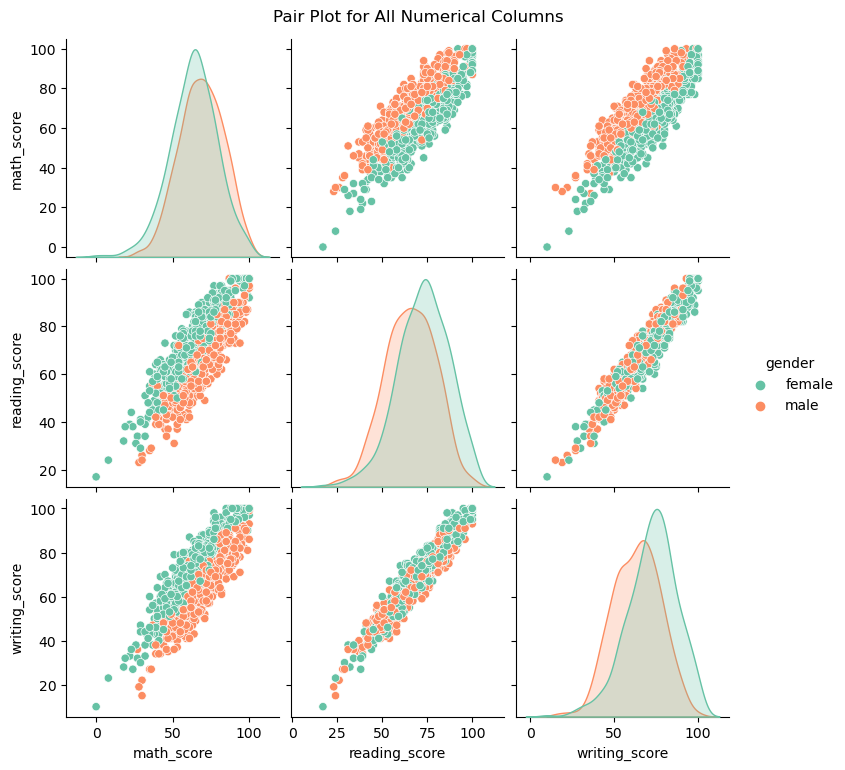

In [14]:
# Pair plot for scatter plots of all numerical columns
sns.pairplot(df, hue='gender', palette='Set2')
plt.suptitle('Pair Plot for All Numerical Columns', y=1.02)
plt.show()

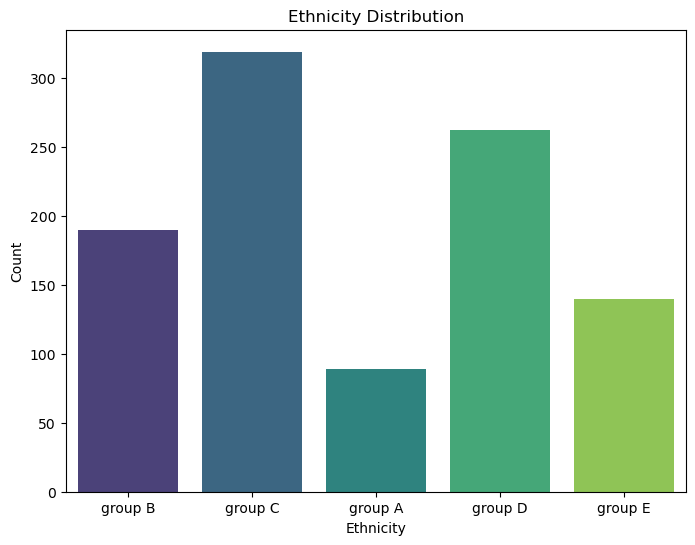

In [15]:
# Bar plot for ethnicity distribution
sns.countplot(x='ethnicity', data=df, palette='viridis')
plt.title('Ethnicity Distribution')
plt.xlabel('Ethnicity')
plt.ylabel('Count')
plt.show()

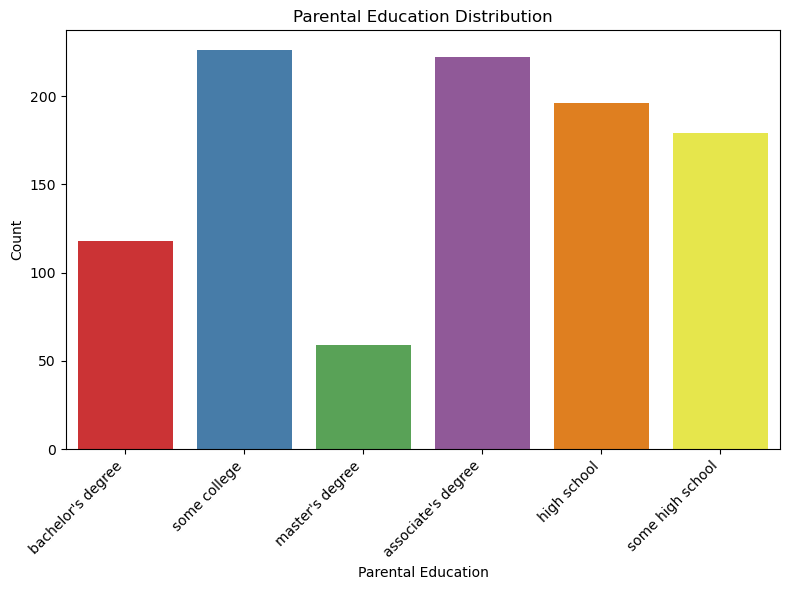

In [16]:
# Bar plot for parental education distribution
sns.countplot(x='parental_education', data=df, palette='Set1')
plt.title('Parental Education Distribution')
plt.xlabel('Parental Education')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

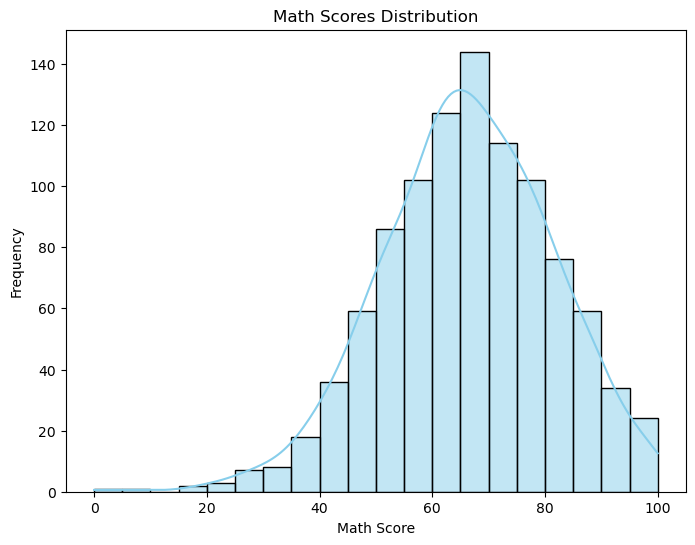

In [17]:
# Histogram for math scores distribution
sns.histplot(df['math_score'], bins=20, kde=True, color='skyblue')
plt.title('Math Scores Distribution')
plt.xlabel('Math Score')
plt.ylabel('Frequency')
plt.show()

In [18]:
df.columns

Index(['gender', 'ethnicity', 'parental_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

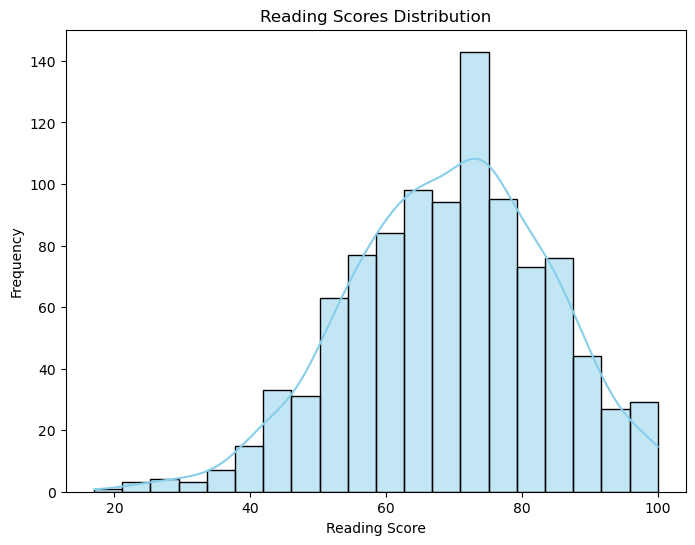

In [19]:
# Histogram for reading scores distribution
sns.histplot(df['reading_score'], bins=20, kde=True, color='skyblue')
plt.title('Reading Scores Distribution')
plt.xlabel('Reading Score')
plt.ylabel('Frequency')
plt.show()

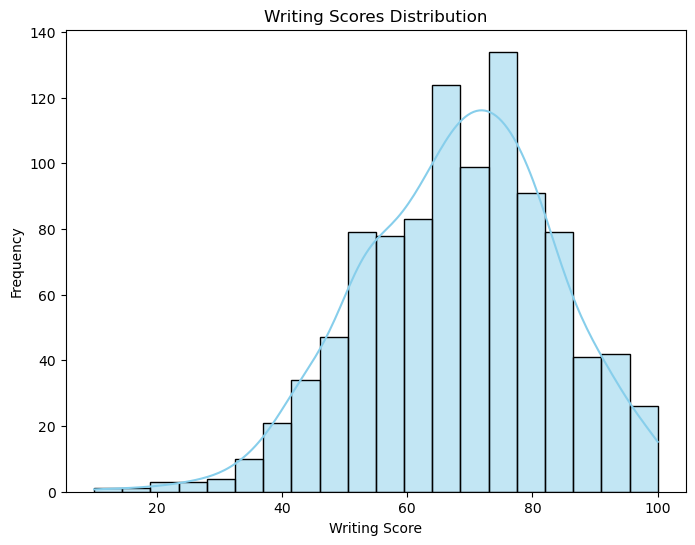

In [20]:
# Histogram for writing scores distribution
sns.histplot(df['writing_score'], bins=20, kde=True, color='skyblue')
plt.title('Writing Scores Distribution')
plt.xlabel('Writing Score')
plt.ylabel('Frequency')
plt.show()

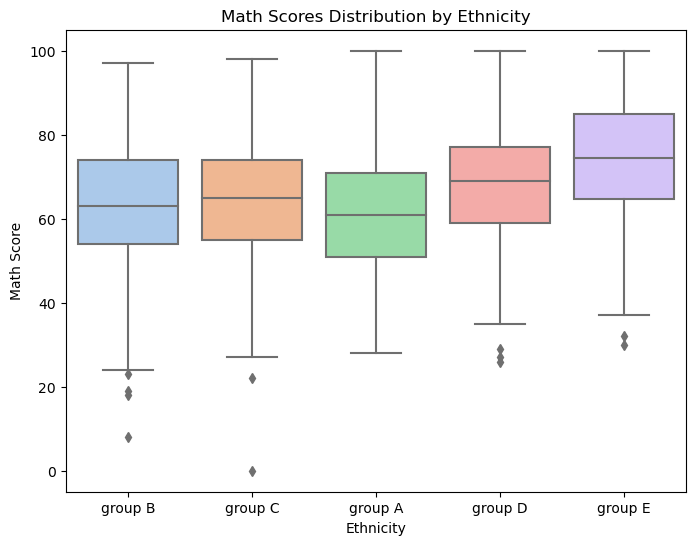

In [21]:
# Box plot for math scores distribution by ethnicity
sns.boxplot(x='ethnicity', y='math_score', data=df, palette='pastel')
plt.title('Math Scores Distribution by Ethnicity')
plt.xlabel('Ethnicity')
plt.ylabel('Math Score')
plt.show()

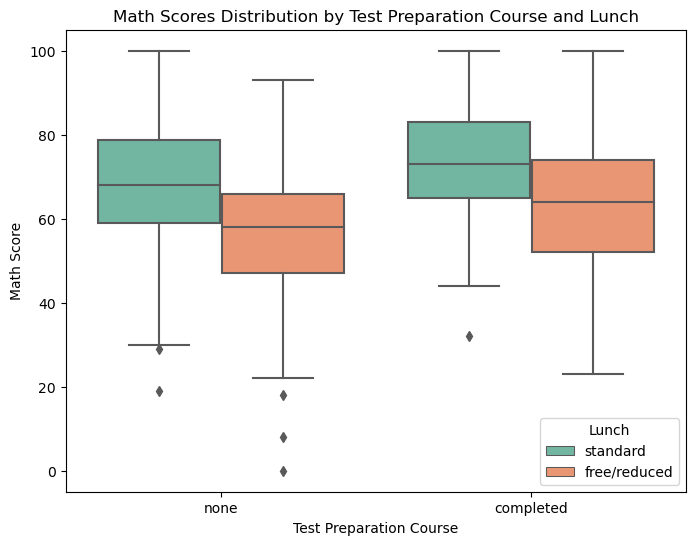

In [22]:
# Box plot for scores distribution by test preparation course and lunch
sns.boxplot(x='test_preparation_course', y='math_score', hue='lunch', data=df, palette='Set2')
plt.title('Math Scores Distribution by Test Preparation Course and Lunch')
plt.xlabel('Test Preparation Course')
plt.ylabel('Math Score')
plt.legend(title='Lunch', loc=4)
plt.show()

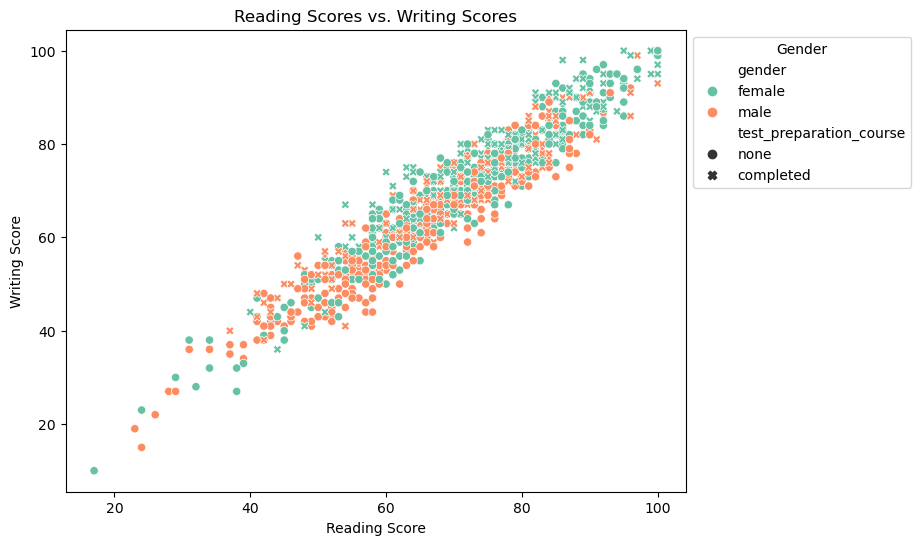

In [23]:
# Scatter plot for reading scores vs. writing scores
sns.scatterplot(x='reading_score', y='writing_score', data=df, hue='gender', style='test_preparation_course', palette='Set2')
plt.title('Reading Scores vs. Writing Scores')
plt.xlabel('Reading Score')
plt.ylabel('Writing Score')
plt.legend(title='Gender', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

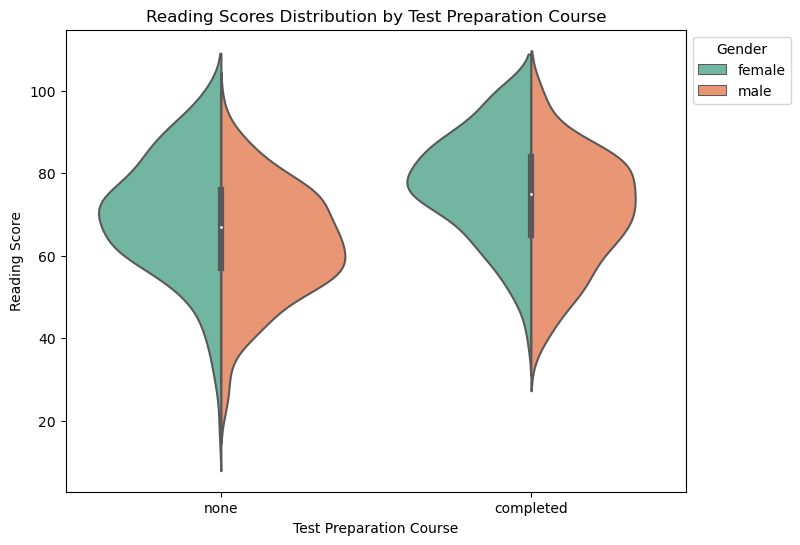

In [24]:
# Violin plot for reading scores distribution by test preparation course
sns.violinplot(x='test_preparation_course', y='reading_score', data=df, hue='gender', split=True, palette='Set2')
plt.title('Reading Scores Distribution by Test Preparation Course')
plt.xlabel('Test Preparation Course')
plt.ylabel('Reading Score')
plt.legend(title='Gender', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

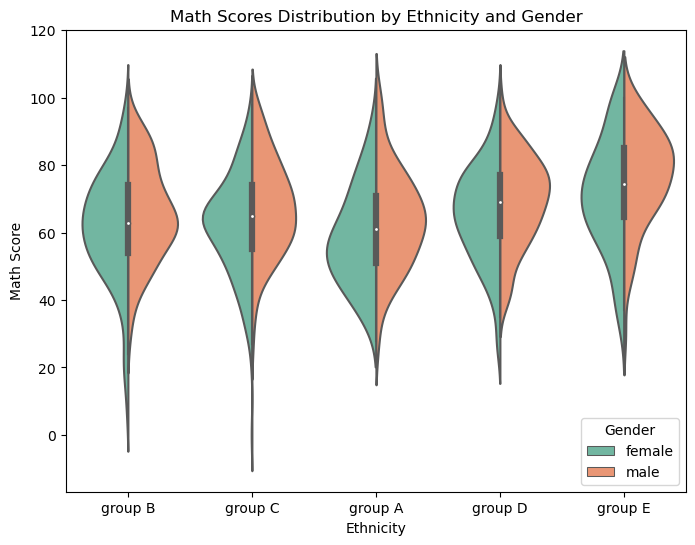

In [25]:
# Violin plot for scores distribution by ethnicity and gender
sns.violinplot(x='ethnicity', y='math_score', hue='gender', data=df, split=True, palette='Set2')
plt.title('Math Scores Distribution by Ethnicity and Gender')
plt.xlabel('Ethnicity')
plt.ylabel('Math Score')
plt.legend(title='Gender', loc=4)
plt.show()

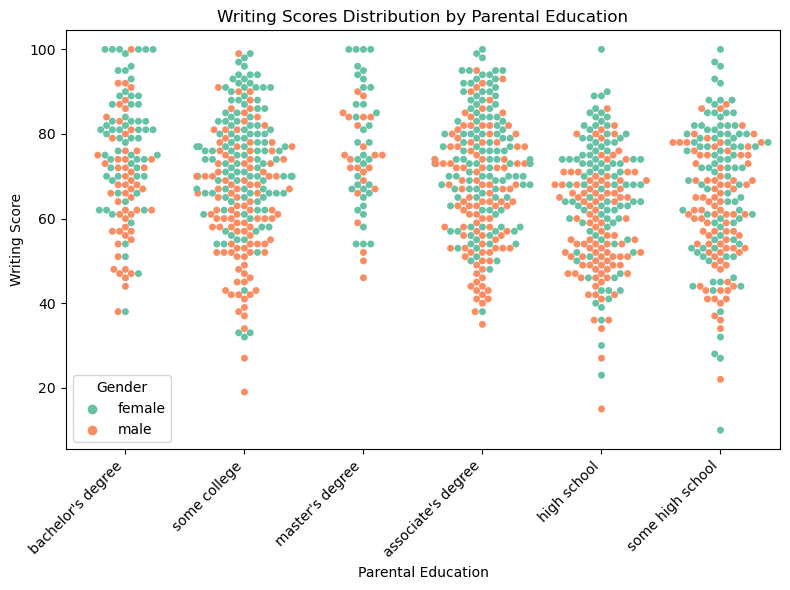

In [26]:
# Swarm plot for writing scores distribution by parental education
sns.swarmplot(x='parental_education', y='writing_score', data=df, hue='gender', palette='Set2')
plt.title('Writing Scores Distribution by Parental Education')
plt.xlabel('Parental Education')
plt.ylabel('Writing Score')
plt.legend(title='Gender', loc=3)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

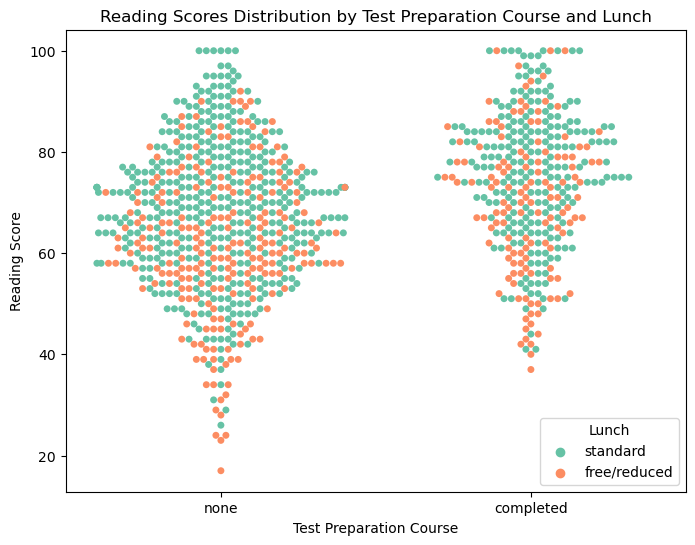

In [27]:
# Swarm plot for scores distribution by lunch and test preparation course
sns.swarmplot(x='test_preparation_course', y='reading_score', hue='lunch', data=df, palette='Set2')
plt.title('Reading Scores Distribution by Test Preparation Course and Lunch')
plt.xlabel('Test Preparation Course')
plt.ylabel('Reading Score')
plt.legend(title='Lunch', loc=4)
plt.show()

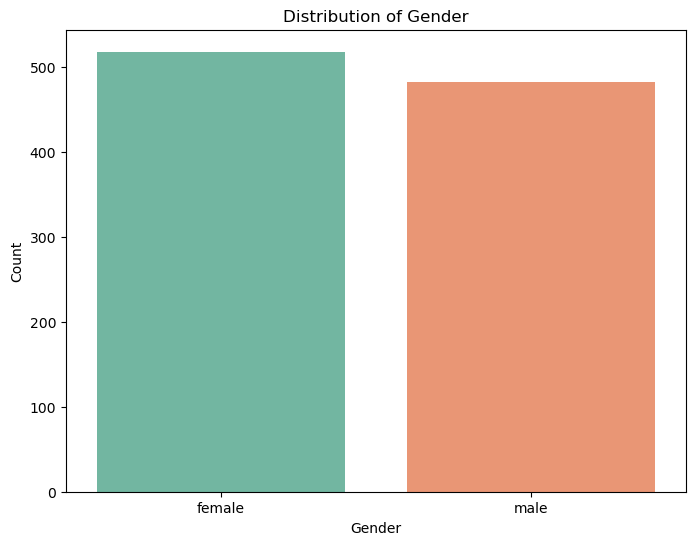

In [28]:
# Plot the result
sns.countplot(data=df,x='gender', palette='Set2')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Gender')
plt.show()

+ There are slightly more females (518) than males (482) in the dataset.

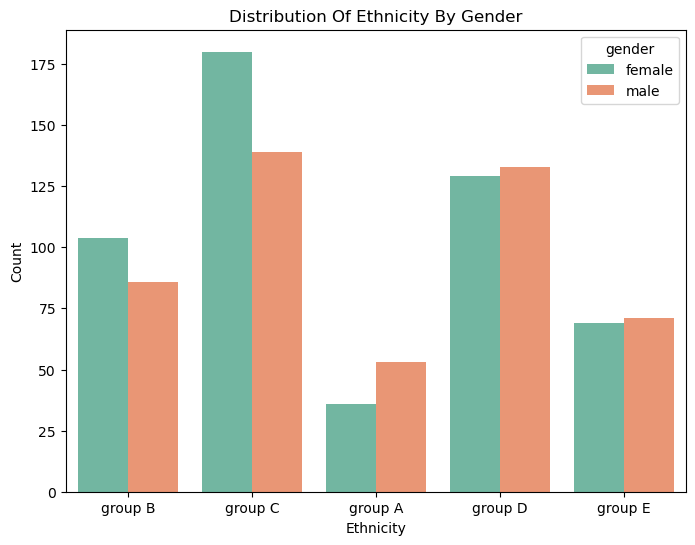

In [29]:
# Countplot of ethnicity by gender
sns.countplot(data=df, x='ethnicity',hue='gender', palette='Set2')
plt.xlabel('Ethnicity')
plt.ylabel('Count')
plt.title('Distribution Of Ethnicity By Gender')
plt.show()

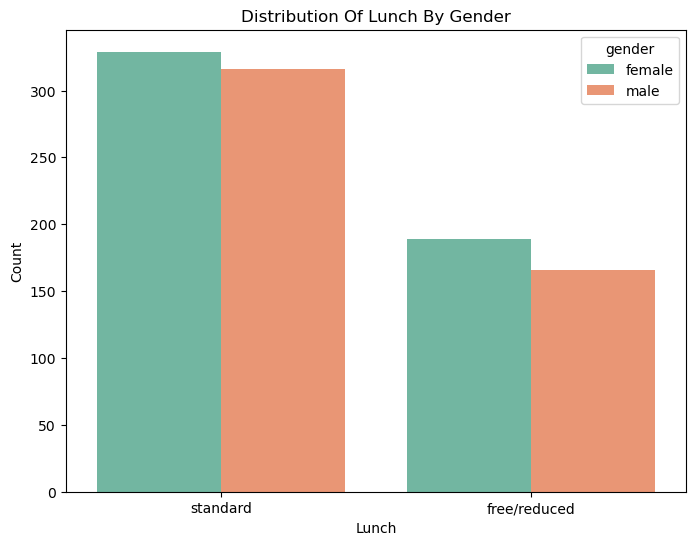

In [30]:
# Countplot of test preparation course by gender
sns.countplot(data=df, x='lunch', hue='gender', palette='Set2')
plt.xlabel('Lunch')
plt.ylabel('Count')
plt.title('Distribution Of Lunch By Gender')
plt.show()

* The average performance of female and male students in each subject (math, reading, and writing) along with the highest and lowest scores attained by each gender group in each subject.

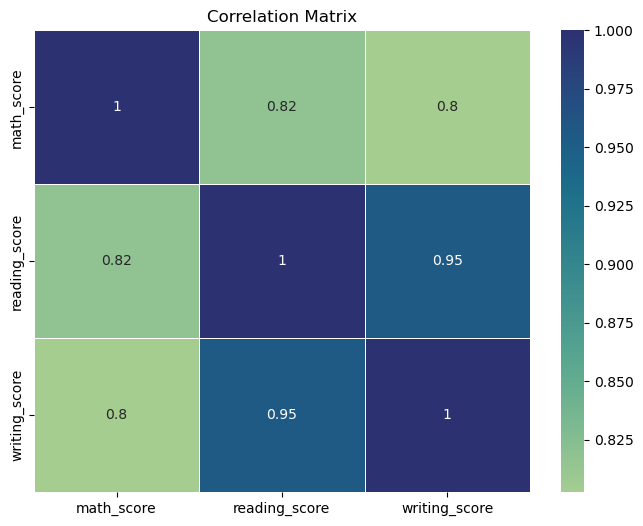

In [31]:
# Calculate correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Heatmap for the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='crest', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### Data Cleaning

+ Remove outlier from math score
+ Remove outlier from writing score
+ Remove outlier from reading score
+ No missing value was detected in data

In [32]:
# Function to remove outliers using IQR method
def remove_outliers(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_whisker = q1 - 1.5 * iqr
    upper_whisker = q3 + 1.5 * iqr
    return df[(df[column] >= lower_whisker) & (df[column] <= upper_whisker)]

# Remove outliers from math_score, writing_score, and reading_score
df_no_outliers = df.copy()  # Create a copy of the original DataFrame
df_no_outliers = remove_outliers(df_no_outliers, 'math_score')
df_no_outliers = remove_outliers(df_no_outliers, 'writing_score')
df_no_outliers = remove_outliers(df_no_outliers, 'reading_score')

df_no_outliers.shape

(986, 8)

I removed outliers from the dataset to perform a statistical test, specifically a t-test, to investigate whether there is a statistically significant difference between the mean math scores of male and female students.

### Statistical Analysis

In [33]:
# import libraries
from scipy.stats import ttest_ind

In [34]:
# Separate the data for male and female students
male_scores = df_no_outliers[df_no_outliers['gender'] == 'male']['math_score']
female_scores = df_no_outliers[df_no_outliers['gender'] == 'female']['math_score']

# Perform the independent samples t-test
t_statistic, p_value = ttest_ind(male_scores, female_scores)

# Display the results
print(f'T-Statistic: {t_statistic}')
print(f'P-Value: {p_value}')

T-Statistic: 5.198127052881179
P-Value: 2.4477657590922683e-07


+ Based on the t-test results, we can conclude that there is a statistically significant difference in the mean 'math_score' between the two groups being compared. The difference is not likely to be due to random chance, and there is evidence to suggest that the two groups have different average 'math_score'.

In [35]:
# Separate the data for male and female students
male_scores1 = df_no_outliers[df_no_outliers['gender'] == 'male']['writing_score']
female_scores1 = df_no_outliers[df_no_outliers['gender'] == 'female']['writing_score']

# Perform the independent samples t-test
t_statistic, p_value = ttest_ind(male_scores1, female_scores1)

# Display the results
print(f'T-Statistic: {t_statistic}')
print(f'P-Value: {p_value}')

T-Statistic: -10.936692977751013
P-Value: 2.3570046779778626e-26


+ The t-test results show that there is a significant difference in the average 'writing_score' between the two groups being compared. However, the significance level is close to the standard threshold of 0.05, which suggests that the difference may not be very large or substantial

In [36]:
# Separate the data for male and female students
male_scores1 = df_no_outliers[df_no_outliers['gender'] == 'male']['reading_score']
female_scores1 = df_no_outliers[df_no_outliers['gender'] == 'female']['reading_score']

# Perform the independent samples t-test
t_statistic, p_value = ttest_ind(male_scores1, female_scores1)

# Display the results
print(f'T-Statistic: {t_statistic}')
print(f'P-Value: {p_value}')

T-Statistic: -8.694768291323197
P-Value: 1.4356254526031793e-17


+ The t-test results provide strong evidence to support the conclusion that there is a significant difference in the average 'reading_score' between the two groups being compared. This difference is not likely to occur by chance alone, indicating that the two groups indeed have different average 'reading_score'.

### Data preprocessing

In [37]:
from sklearn.preprocessing import LabelEncoder

In [38]:
# Convert categorical variables to numeric using LabelEncoder
label_encoder = LabelEncoder()
df_no_outliers['gender_encoded'] = label_encoder.fit_transform(df_no_outliers['gender'])
df_no_outliers['lunch_encoded'] = label_encoder.fit_transform(df_no_outliers['lunch'])
df_no_outliers['parental_education_encoded'] = label_encoder.fit_transform(df_no_outliers['parental_education'])
df_no_outliers['test_preparation_course_encoded'] = label_encoder.fit_transform(df_no_outliers['test_preparation_course'])
df_no_outliers['ethnicity_encoded'] = label_encoder.fit_transform(df_no_outliers['ethnicity'])

df_no_outliers.head(10)

,gender,ethnicity,parental_education,lunch,test_preparation_course,math_score,reading_score,writing_score,gender_encoded,lunch_encoded,parental_education_encoded,test_preparation_course_encoded,ethnicity_encoded
0,female,group B,bachelor's degree,standard,none,72,72,74,0,1,1,1,1
1,female,group C,some college,standard,completed,69,90,88,0,1,4,0,2
2,female,group B,master's degree,standard,none,90,95,93,0,1,3,1,1
3,male,group A,associate's degree,free/reduced,none,47,57,44,1,0,0,1,0
4,male,group C,some college,standard,none,76,78,75,1,1,4,1,2
5,female,group B,associate's degree,standard,none,71,83,78,0,1,0,1,1
6,female,group B,some college,standard,completed,88,95,92,0,1,4,0,1
7,male,group B,some college,free/reduced,none,40,43,39,1,0,4,1,1
8,male,group D,high school,free/reduced,completed,64,64,67,1,0,2,0,3
9,female,group B,high school,free/reduced,none,38,60,50,0,0,2,1,1


### Machine Learning
+ Linear regression 
+ Logistic regression

In [39]:
# Import libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [40]:
# Prepare the data for regression
X = df_no_outliers[['math_score', 'reading_score', 'gender_encoded', 'lunch_encoded', 'parental_education_encoded', 'test_preparation_course_encoded', 'ethnicity_encoded']]  # Input features
y = df_no_outliers['writing_score']  # Target variable

In [41]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
# Create and train the linear regression model
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

LinearRegression()

In [43]:
# Make predictions on the test set
y_pred = reg_model.predict(X_test)

In [44]:
# Get the intercetp of the model
reg_model.intercept_

8.744784394019192

In [45]:
# Get the coefficients of the model
reg_model.coef_

array([ 0.27647159,  0.67087385, -5.88575095, -0.0277315 , -0.11595065,
       -3.33307777,  0.0259961 ])

In [46]:
# Get the coefficients from the linear regression model
coef_data = {'Feature': X.columns, 'Coefficient': reg_model.coef_}

# Create the DataFrame
df_coef = pd.DataFrame(coef_data)

# Display the DataFrame
df_coef

,Feature,Coefficient
0,math_score,0.276472
1,reading_score,0.670874
2,gender_encoded,-5.885751
3,lunch_encoded,-0.027731
4,parental_education_encoded,-0.115951
5,test_preparation_course_encoded,-3.333078
6,ethnicity_encoded,0.025996


+ The coefficients provide insights into the relative impact of each feature on the 'writing_score' prediction. Positive coefficients indicate a positive association with 'writing_score', while negative coefficients indicate a negative association.

In [47]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 15.26261017769061
R-squared: 0.9290768481450763


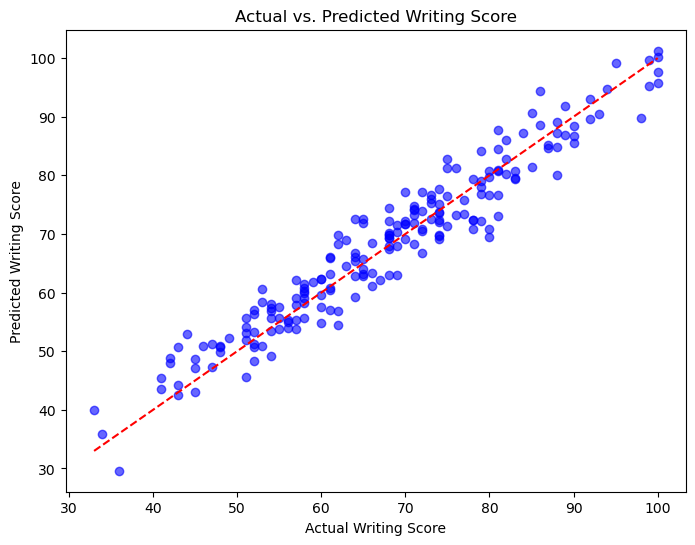

In [48]:
# Plot the actual 'writing_score' against the predicted 'writing_score'
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Writing Score')
plt.ylabel('Predicted Writing Score')
plt.title('Actual vs. Predicted Writing Score')
plt.show()

+ The regression model's performance is quite good. The Mean Squared Error (MSE) of around 15.26 tells us that, on average, the model's predictions are quite close to the actual 'writing_score' values. 

+ The R-squared value of approximately 0.93 indicates that the model can explain about 93% of the variability in the 'writing_score' using the features 'math_score', 'reading_score', 'gender_encoded', 'lunch_encoded', 'parental_education_encoded', 'test_preparation_course_encoded', and 'ethnicity_encoded'. 

+ Overall, these results shows that the regression model is performing well and has a strong ability to predict the 'writing_score' based on the provided features.

In [49]:
# Train-Test Split
X1 = df_no_outliers[['math_score', 'reading_score', 'writing_score']]
y1 = df_no_outliers['gender_encoded']

In [50]:
# Split the data into training and testing sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [51]:
# Model Selection (Using Logistic Regression)
clf = LogisticRegression()

In [52]:
# Model Training
clf.fit(X_train1, y_train1)

LogisticRegression()

In [53]:
# Model Prediction
y_pred1 = clf.predict(X_test1)

In [54]:
# Model Evaluation
accuracy = accuracy_score(y_test1, y_pred1)
classification_report_output = classification_report(y_test1, y_pred1)
conf_matrix = confusion_matrix(y_test1, y_pred1)

print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report_output)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.8888888888888888
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       102
           1       0.89      0.89      0.89        96

    accuracy                           0.89       198
   macro avg       0.89      0.89      0.89       198
weighted avg       0.89      0.89      0.89       198

Confusion Matrix:
[[91 11]
 [11 85]]


In [55]:
# Print the number of correct and incorrect predictions
num_correct_predictions = accuracy_score(y_test1, y_pred1, normalize=False)
num_incorrect_predictions = len(y_test1) - num_correct_predictions
print("Number of Correct Predictions:", num_correct_predictions)
print("Number of Incorrect Predictions:", num_incorrect_predictions)

Number of Correct Predictions: 176
Number of Incorrect Predictions: 22


The logistic model achieved good accuracy and performance on the dataset without outliers. The precision, recall, and F1-score are consistently high for both classes, indicating that the model is effective in correctly classifying instances of both '0' and '1' (representing 'female' and 'male', respectively).